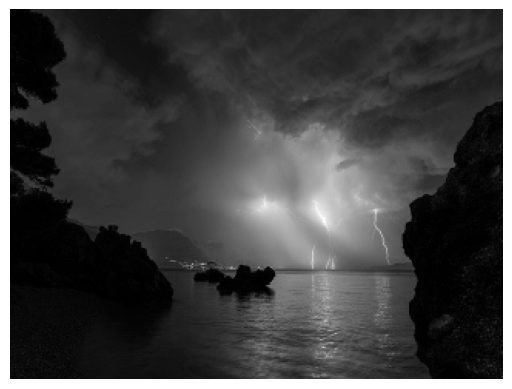

In [2]:
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread("d:/data/images/img6.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [3]:
import numpy as np
#히스토그램 평탄화(평활화)
res1 = cv2.equalizeHist(img1)
ch1 = [0]
ranges1 = [0, 256]
histSize1 = [256]
#히스토그램 계산
hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1)
hist2 = cv2.calcHist([res1], ch1, None, histSize1, ranges1)
#상수곱, 로그곱, 거듭제곱 변환 기반 명암비 조절 및 히스토그램 계산
multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
invol1_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
multi_v = 2; gamma1 = 0.4
thres1 = 5; thres2 = 100
max_v_log = 255 / np.log(1 + 255)
max_v_invol1 = 255 / np.power(255, gamma1)
for i in range(256):
    val = i * multi_v
    if val > 255 : val = 255
    multi_lut[i] = val
    log_lut[i] = np.round(max_v_log * np.log(1+i))
# 명암비 조절
res2 = cv2.LUT(img1, multi_lut)
res3 = cv2.LUT(img1, log_lut)
hist3 = cv2.calcHist([res2], ch1, None, histSize1, ranges1)
hist4 = cv2.calcHist([res3], ch1, None, histSize1, ranges1)

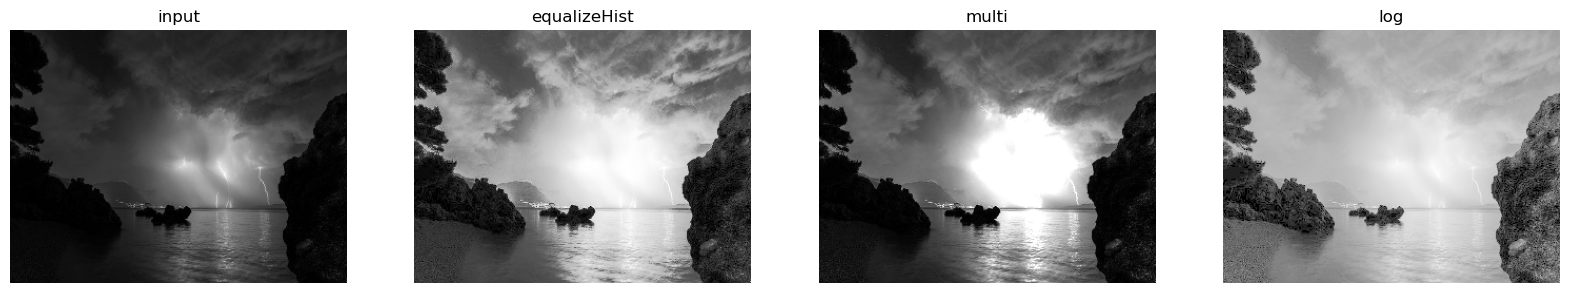

In [4]:
bin_x = np.arange(256)
fig_index = 0
displays = [("input", img1),
            ("equalizeHist", res1),
            ("multi", res2),
            ("log", res3)]
plt.figure(figsize=(20,5))
for idx,(name, out) in enumerate(displays):
    plt.subplot(1,4,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

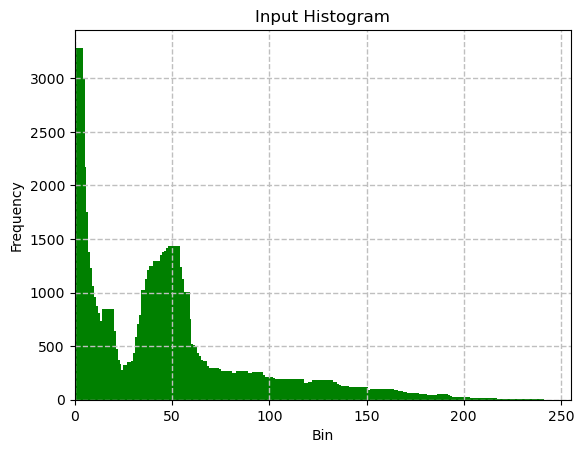

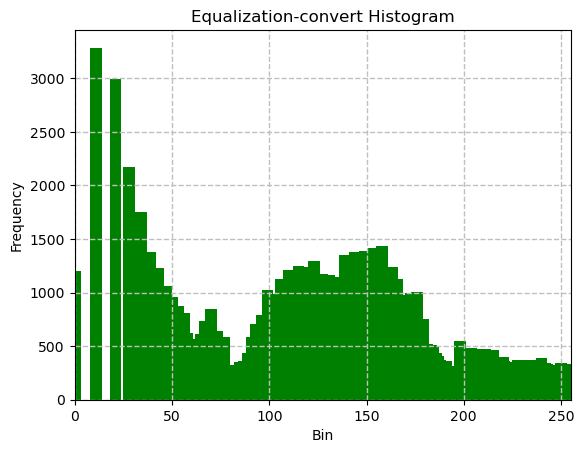

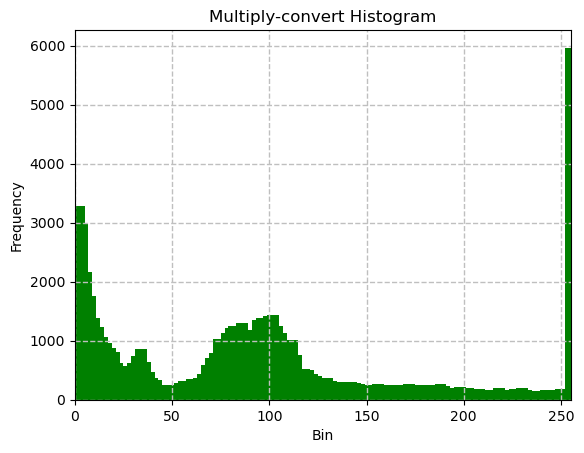

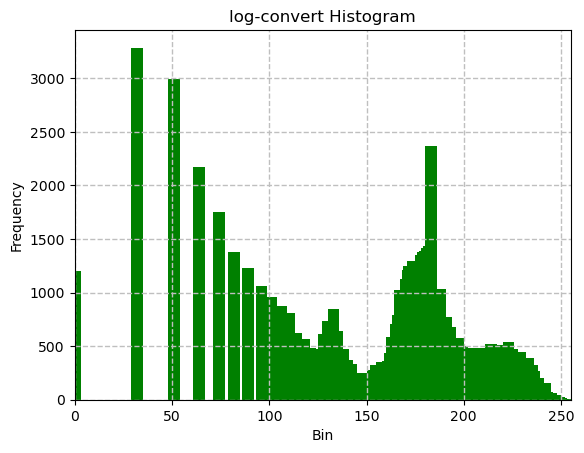

In [5]:
dlsplay_hist = [("Input Histogram", hist1),
                ("Equalization-convert Histogram", hist2),
                ("Multiply-convert Histogram", hist3),
                ("log-convert Histogram", hist4)]

for (name, out) in dlsplay_hist:
    plt.figure(fig_index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(bin_x, out[:,0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])
    fig_index += 1
plt.show() # 오른쪽에 치우쳐져 있을수록 밝음

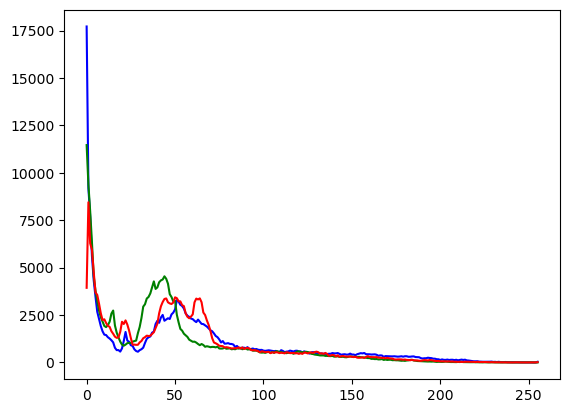

In [7]:
img1 = cv2.imread("d:/data/images/img6.jpg")
channels = cv2.split(img1)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()